# Lab 7: Convolutions and Convolutional neural networks



```

- Machine Learning, Innopolis University (Fall semester 2024)

- Instructors: Adil Khan & Gcinizwe Dlamini

```

<hr>





```

In this lab, you will practice simple deep learning model in Pytorch.



Lab Plan

1. Convolutions - application examples

2. Building CNN in PyTorch

    - example CNN

    - comparing with Fully-connected NN



```



<hr>

## 1. Recap



1. What is the use of convolutions? (In general)

2. Why use convolutional layers instead of fully-connected ones?




## 2. Convolutions

Let's upload some image (you can try your own image changing the url)

In [1]:
import urllib.request

url = "https://www.dropbox.com/scl/fi/0n8y4jtqdt51xedwgpb5g/grid_img.jpg?rlkey=ud5912lz83u0z05dicfvq1w3z&st=stuhlkhe&dl=1"

filename = 'grid_img.jpg'

urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x213a4b854d0>)

## 2. Reading image data

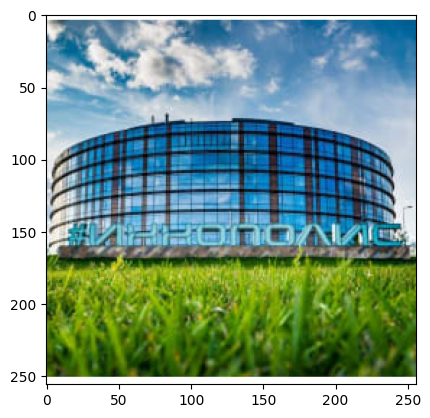

In [2]:
import numpy as np

import cv2

import matplotlib.pyplot as plt

from skimage.color import rgb2gray

from scipy import ndimage



# Let's read and plot the image

image = plt.imread('grid_img.jpg')

plt.imshow(image)

## 2.1 Operations on Image Data

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


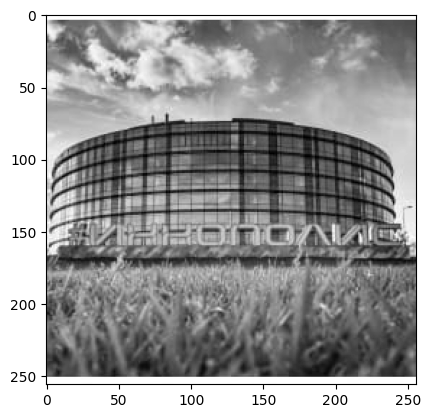

In [3]:
gray_image = rgb2gray(image)

plt.imshow(gray_image * 100, cmap='gray')

print("original img shape: ", image.shape)

print("grayscale img shape", gray_image.shape)

## 2.2 Convolutions for edge-detecting

In [4]:
# first, let's define edge-detecting filters

horizontal_kernel = np.array([[1, 1, 1],

                              [0, 0, 0],

                              [-1, -1, -1]])

print(horizontal_kernel, 'is a kernel for detecting horizontal edges')



vertical_kernel = np.array([[-1, 0, 1],

                            [-1, 0, 1],

                            [-1, 0, 1]])

print(vertical_kernel, 'is a kernel for detecting vertical edges')



# out_h = ndimage.convolve(gray_image, sobel_horizontal, mode='reflect')

# out_v = ndimage.convolve(gray_image, sobel_vertical, mode='reflect')

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


Let's apply different types of convolutions on this image. Complete the following function.



Take care of dimensions - the resuting image should be of the same size.

Hint:



![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)



**TASK:** Define the convolution method

Horizontal kernel applied


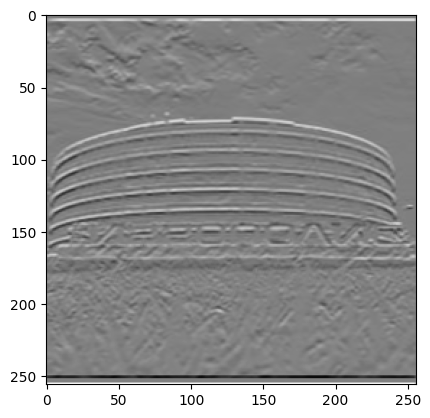

In [6]:
# Apply kernel on input image such that the image size is preserved

def convolve(img, kernel):

    height, width = img.shape

    filter_size = kernel.shape[0]



    # Ensure the kernel size is odd for symmetrical padding

    if (filter_size - 1) % 2 != 0:

        raise ValueError("Invalid kernel size. Kernel size must be odd for proper padding.")



    padding = (filter_size - 1) // 2



    # Use np.pad for consistent padding, with zero padding on edges

    padded_img = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)



    # Initialize the result array

    result = np.zeros((height, width))



    for i in range(height):

        for j in range(width):

            # Extract the region of interest

            region = padded_img[i:i + filter_size, j:j + filter_size]

            # Perform element-wise multiplication and sum the results

            result[i, j] = np.sum(region * kernel)



    return result



# Example usage

c = convolve(gray_image, horizontal_kernel)

print("Horizontal kernel applied")

plt.imshow(c, cmap='gray')

plt.show()

Vertical kernel applied


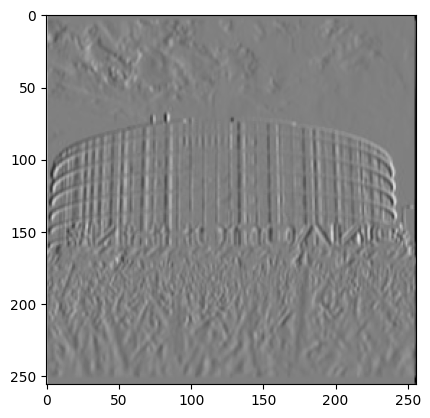

In [7]:
c = convolve(gray_image, vertical_kernel)

print("Vertical kernel applied")

plt.imshow(c, cmap='gray')

Your kernel applied


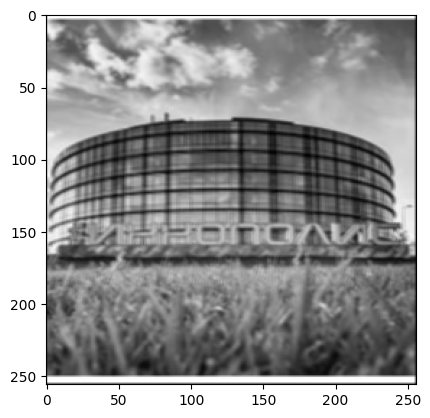

In [8]:
# play with numbers, see how changing the kernel affects the result

your_kernel = np.array([[0, 1, 0],

                        [9, 1, 9],

                        [3, 9, 8]])



c = convolve(gray_image, your_kernel)

print("Your kernel applied")

plt.imshow(c, cmap='gray')



some_kernel = np.array([[-1]])

## 3. CNN with PyTorch



### 3.1. Data Loading

In [9]:
import os

import torch

import torch.nn as nn

import torch.optim as optim

from torch.utils.data import DataLoader

from torchvision import datasets, transforms



# Random seed for reproducibility

torch.manual_seed(42)



# Device configuration: Use GPU if available, otherwise CPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Batch sizes

train_batch_size = 32

test_batch_size = 100



# Data transformations: Normalize with mean and std values for MNIST

data_transforms = transforms.Compose([

    transforms.ToTensor(),

    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std

])



# Define dataset paths

data_path = os.path.join(".", "data")



# Load MNIST datasets with transformations

train_dataset = datasets.MNIST(root=data_path, train=True, download=True, transform=data_transforms)

test_dataset = datasets.MNIST(root=data_path, train=False, download=True, transform=data_transforms)



# Data loaders: Shuffle training data, no need to shuffle test data

train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)



# Print device information

print(f"Using device: {device}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:36<00:00, 269787.79it/s] 


Extracting .\data\MNIST\raw\train-images-idx3-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 199424.61it/s]


Extracting .\data\MNIST\raw\train-labels-idx1-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1531458.37it/s]


Extracting .\data\MNIST\raw\t10k-images-idx3-ubyte.gz to .\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2439873.05it/s]

Extracting .\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\data\MNIST\raw

Using device: cpu


## 3.2 CNN model



**Task:**

- Define a CNN model with two convolutional layes, dropout layer and two fully connected layers (one hidden layer + output layer)

- Define the forward method in the CNN model where each convolutional layer is followed by a max pooling and each fully connected layer followed by dropout.

- Use Relu as activation function for the all hidden layers

- Use kernel size = 5 for the convolutional layes

In [10]:
import torch.nn.functional as F



class CNN(nn.Module):

    # Convolution formula: ((n + 2p - f) / s) + 1



    def __init__(self):

        super(CNN, self).__init__()



        # First convolutional layer: input channels = 1 (grayscale), output channels = 10, kernel size = 5

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)



        # Second convolutional layer: input channels = 10, output channels = 20, kernel size = 5

        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)



        # Dropout layer for conv layers

        self.conv_drop = nn.Dropout2d()



        # Fully connected layers

        # The input size (??) is dynamically determined in the forward pass

        self.fc1 = None

        self.fc2 = nn.Linear(in_features=50, out_features=10)



        # Dropout for fully connected layers

        self.fc_drop = nn.Dropout(p=0.5)



    def forward(self, x):

        # Conv1 -> ReLU -> MaxPool

        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2))

        # Calculate the shape after this layer:

        # Input: (28x28x1), Output: (?? x ?? x ??), Pooling: (?? x ?? x ??)



        # Conv2 -> ReLU -> MaxPool -> Dropout

        x = F.relu(F.max_pool2d(self.conv_drop(self.conv2(x)), kernel_size=2))

        # Input: (?? x ?? x ??), Output: (?? x ?? x ??), Pooling: (?? x ?? x ??)



        # Flattening the output to feed into fully connected layers

        x = x.view(x.size(0), -1)  # Automatically computes the correct flattening size

        # Flattened size: ?? (height * width * channels)

        if self.fc1 is None:

            self.fc1 = nn.Linear(in_features=x.size(1), out_features=50).to(x.device)



        # FC1 -> ReLU -> Dropout

        x = F.relu(self.fc1(x))

        x = self.fc_drop(x)



        # FC2 -> LogSoftmax for final output

        x = F.log_softmax(self.fc2(x), dim=1)

        return x



# Device configuration: Automatically set to CUDA if available, otherwise CPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Model initialization and sending to the device

model_cnn = CNN().to(device)

## 2.2 Fully-conected model from the last class



 TASK: reducing number of params to match that of CNN

In [11]:
class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()



        # Reduce the number of neurons to match the parameter count of a typical CNN

        self.fc1 = nn.Linear(28*28, 256)  # Input layer: 28*28 pixels, reduced to 256

        self.fc2 = nn.Linear(256, 128)    # Hidden layer 1: 256 -> 128

        self.fc3 = nn.Linear(128, 64)     # Hidden layer 2: 128 -> 64

        self.fc4 = nn.Linear(64, 10)      # Output layer: 64 -> 10 (for 10 classes)



        # Dropout to prevent overfitting

        self.dropout = nn.Dropout(p=0.5)



        # Initialize weights using a uniform distribution for better convergence

        self._init_weights()



    def _init_weights(self):

        """Custom weight initialization to improve training stability"""

        for m in self.modules():

            if isinstance(m, nn.Linear):

                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')

                if m.bias is not None:

                    nn.init.constant_(m.bias, 0.01)



    def forward(self, x):

        # Flatten the input tensor (batch_size, 28*28)

        x = x.view(-1, 28*28)



        # Forward pass through the fully connected layers with ReLU activations

        x = torch.relu(self.fc1(x))

        x = self.dropout(x)  # Apply dropout after each hidden layer



        x = torch.relu(self.fc2(x))

        x = self.dropout(x)



        x = torch.relu(self.fc3(x))

        x = self.dropout(x)



        # Output layer (log_softmax for classification)

        x = self.fc4(x)

        return torch.nn.functional.log_softmax(x, dim=1)



# Device configuration: Use GPU if available, otherwise CPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Model instantiation and sending to the device

model_nn = Net().to(device)


### Counting number of model trainable parameters

In [12]:
def count_parameters(model):

    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [13]:
# Let's compare the number of parameters of these models:

print("Number of params in the Fully-connected model:", count_parameters(model_nn))

print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the Fully-connected model: 242762
Number of params in the CNN model: 5790


Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance

## 3. Training and testing

In [15]:
from tqdm import tqdm  # For progress bar

from sklearn.metrics import f1_score



def train(model, device, train_loader, optimizer, epoch):

    model.train()

    total_loss = 0

    correct = 0

    num_batches = len(train_loader)



    # tqdm progress bar for better tracking of batch progress

    for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch}")):

        data, target = data.to(device), target.to(device)



        # TODO: Zero the gradients

        optimizer.zero_grad()



        # TODO: Forward pass

        output = model(data)



        # TODO: Calculate loss

        loss = torch.nn.functional.nll_loss(output, target)



        # TODO: Backward pass

        loss.backward()

        optimizer.step()



        # Accumulate loss for average calculation

        total_loss += loss.item()



        # Calculate accuracy

        pred = output.argmax(dim=1, keepdim=True)

        correct += pred.eq(target.view_as(pred)).sum().item()



    avg_loss = total_loss / num_batches

    accuracy = 100. * correct / len(train_loader.dataset)

    print(f'==> Epoch {epoch} Completed: Average Loss: {avg_loss:.6f}\tAccuracy: {accuracy:.2f}%')





def test(model, device, test_loader):

    model.eval()

    test_loss = 0

    correct = 0

    all_preds = []  # Store all predictions

    all_targets = []  # Store all true labels

    with torch.no_grad():

        for data, target in tqdm(test_loader, desc="Testing"):

            data, target = data.to(device), target.to(device)



            # Forward pass (no backprop during evaluation)

            output = model(data)

            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss



            # Prediction and accuracy

            pred = output.argmax(dim=1, keepdim=True)

            correct += pred.eq(target.view_as(pred)).sum().item()



            all_preds.extend(pred.cpu().numpy())  # Convert predictions to numpy

            all_targets.extend(target.cpu().numpy())  # Convert targets to numpy





    # Calculate test f1, accuracy and loss over all batches

    test_loss /= len(test_loader.dataset)



    f1 = f1_score(all_targets, all_preds, average='weighted')

    accuracy = 100. * correct / len(test_loader.dataset)



    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%), F1-Score {:.2f}\n'.format(

        test_loss, correct, len(test_loader.dataset),

        100. * correct / len(test_loader.dataset), f1))





    # print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')



    # Return test loss and accuracy for tracking

    return test_loss, accuracy


## Training the CNN model

In [16]:
from torch.optim.lr_scheduler import StepLR  # Scheduler for learning rate



# Hyperparameters

epochs = 10

lr = 0.01

momentum = 0.5

patience = 3  # Early stopping patience (Optional)



# Model and optimizer

model = model_cnn.to(device)

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)



# Optional: Learning rate scheduler (reduces the learning rate by a factor of 0.1 every 5 epochs)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)



# Training loop

best_accuracy = 0

early_stop_counter = 0



for epoch in range(1, epochs + 1):

    print(f"\nEpoch {epoch}/{epochs}")



    # Training phase

    train(model, device, train_loader, optimizer, epoch)



    # Testing phase and result unpacking

    test_loss, test_accuracy = test(model, device, test_loader)



    # Save best model based on test accuracy

    if test_accuracy > best_accuracy:

        best_accuracy = test_accuracy

        torch.save(model.state_dict(), "best_mnist_cnn.pt")

        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")

        early_stop_counter = 0  # Reset early stop counter if model improves

    else:

        early_stop_counter += 1



    # Early stopping (Optional)

    if early_stop_counter >= patience:

        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")

        break



    # Step the scheduler (if using a learning rate scheduler)

    scheduler.step()



# Final model save (optional)

torch.save(model.state_dict(), "final_mnist_cnn.pt")

print("Training complete. Model saved as 'final_mnist_cnn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:20<00:00, 91.22it/s] 


==> Epoch 1 Completed: Average Loss: 1.513055	Accuracy: 46.91%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.44it/s]


Test set: Average loss: 0.5224, Accuracy: 9141/10000 (91.41%), F1-Score 0.91

Best model saved with accuracy: 91.41%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:18<00:00, 102.68it/s]


==> Epoch 2 Completed: Average Loss: 0.988543	Accuracy: 66.33%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.38it/s]


Test set: Average loss: 0.3225, Accuracy: 9330/10000 (93.30%), F1-Score 0.93

Best model saved with accuracy: 93.30%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:18<00:00, 103.82it/s]


==> Epoch 3 Completed: Average Loss: 0.872133	Accuracy: 70.84%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.89it/s]


Test set: Average loss: 0.2801, Accuracy: 9480/10000 (94.80%), F1-Score 0.95

Best model saved with accuracy: 94.80%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:18<00:00, 103.97it/s]


==> Epoch 4 Completed: Average Loss: 0.803893	Accuracy: 72.95%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.62it/s]


Test set: Average loss: 0.2386, Accuracy: 9502/10000 (95.02%), F1-Score 0.95

Best model saved with accuracy: 95.02%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:18<00:00, 104.08it/s]


==> Epoch 5 Completed: Average Loss: 0.761122	Accuracy: 74.35%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.13it/s]


Test set: Average loss: 0.2094, Accuracy: 9530/10000 (95.30%), F1-Score 0.95

Best model saved with accuracy: 95.30%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:18<00:00, 103.57it/s]


==> Epoch 6 Completed: Average Loss: 0.717051	Accuracy: 76.17%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.06it/s]


Test set: Average loss: 0.2075, Accuracy: 9537/10000 (95.37%), F1-Score 0.95

Best model saved with accuracy: 95.37%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:18<00:00, 104.11it/s]


==> Epoch 7 Completed: Average Loss: 0.698232	Accuracy: 76.87%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.24it/s]


Test set: Average loss: 0.1968, Accuracy: 9541/10000 (95.41%), F1-Score 0.95

Best model saved with accuracy: 95.41%

Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:17<00:00, 104.86it/s]


==> Epoch 8 Completed: Average Loss: 0.698823	Accuracy: 76.75%


Testing: 100%|██████████| 100/100 [00:02<00:00, 46.55it/s]


Test set: Average loss: 0.1949, Accuracy: 9554/10000 (95.54%), F1-Score 0.96

Best model saved with accuracy: 95.54%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:17<00:00, 104.39it/s]


==> Epoch 9 Completed: Average Loss: 0.697189	Accuracy: 76.83%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.12it/s]


Test set: Average loss: 0.1952, Accuracy: 9567/10000 (95.67%), F1-Score 0.96

Best model saved with accuracy: 95.67%

Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:18<00:00, 103.89it/s]


==> Epoch 10 Completed: Average Loss: 0.686477	Accuracy: 77.19%


Testing: 100%|██████████| 100/100 [00:02<00:00, 47.17it/s]

Test set: Average loss: 0.1985, Accuracy: 9550/10000 (95.50%), F1-Score 0.96

Training complete. Model saved as 'final_mnist_cnn.pt'.


## Train the fully-connected model

In [17]:
# Model and optimizer setup

model = model_nn.to(device)

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)



# Optional: Learning rate scheduler (reduces LR every 5 epochs)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)



# Initialize parameters

best_accuracy = 0.0

early_stop_counter = 0

patience = 3  # Early stopping patience



for epoch in range(1, epochs + 1):

    print(f"\nEpoch {epoch}/{epochs}")



    # Training phase

    train(model, device, train_loader, optimizer, epoch)



    # Testing phase and result unpacking

    test_loss, test_accuracy = test(model, device, test_loader)



    # Save the best model based on test accuracy

    if test_accuracy > best_accuracy:

        best_accuracy = test_accuracy

        torch.save(model.state_dict(), "best_mnist_nn.pt")

        print(f"Best model saved with accuracy: {best_accuracy:.2f}%")

        early_stop_counter = 0  # Reset the early stopping counter

    else:

        early_stop_counter += 1



    # Early stopping mechanism

    if early_stop_counter >= patience:

        print(f"Early stopping at epoch {epoch} due to no improvement in test accuracy.")

        break



    # Step the scheduler (if using one)

    scheduler.step()



# Save the final model (optional)

torch.save(model.state_dict(), "final_mnist_nn.pt")

print("Training complete. Final model saved as 'final_mnist_nn.pt'.")



Epoch 1/10


Training Epoch 1: 100%|██████████| 1875/1875 [00:16<00:00, 111.55it/s]


==> Epoch 1 Completed: Average Loss: 0.988674	Accuracy: 68.51%


Testing: 100%|██████████| 100/100 [00:01<00:00, 51.15it/s]


Test set: Average loss: 0.2912, Accuracy: 9196/10000 (91.96%), F1-Score 0.92

Best model saved with accuracy: 91.96%

Epoch 2/10


Training Epoch 2: 100%|██████████| 1875/1875 [00:14<00:00, 133.36it/s]


==> Epoch 2 Completed: Average Loss: 0.497334	Accuracy: 86.08%


Testing: 100%|██████████| 100/100 [00:01<00:00, 53.11it/s]


Test set: Average loss: 0.2114, Accuracy: 9429/10000 (94.29%), F1-Score 0.94

Best model saved with accuracy: 94.29%

Epoch 3/10


Training Epoch 3: 100%|██████████| 1875/1875 [00:13<00:00, 135.12it/s]


==> Epoch 3 Completed: Average Loss: 0.389671	Accuracy: 89.32%


Testing: 100%|██████████| 100/100 [00:02<00:00, 50.00it/s]


Test set: Average loss: 0.1850, Accuracy: 9488/10000 (94.88%), F1-Score 0.95

Best model saved with accuracy: 94.88%

Epoch 4/10


Training Epoch 4: 100%|██████████| 1875/1875 [00:14<00:00, 133.78it/s]


==> Epoch 4 Completed: Average Loss: 0.342196	Accuracy: 91.01%


Testing: 100%|██████████| 100/100 [00:01<00:00, 52.69it/s]


Test set: Average loss: 0.1634, Accuracy: 9541/10000 (95.41%), F1-Score 0.95

Best model saved with accuracy: 95.41%

Epoch 5/10


Training Epoch 5: 100%|██████████| 1875/1875 [00:14<00:00, 130.68it/s]


==> Epoch 5 Completed: Average Loss: 0.301311	Accuracy: 92.03%


Testing: 100%|██████████| 100/100 [00:01<00:00, 52.75it/s]


Test set: Average loss: 0.1492, Accuracy: 9596/10000 (95.96%), F1-Score 0.96

Best model saved with accuracy: 95.96%

Epoch 6/10


Training Epoch 6: 100%|██████████| 1875/1875 [00:14<00:00, 130.97it/s]


==> Epoch 6 Completed: Average Loss: 0.262692	Accuracy: 93.12%


Testing: 100%|██████████| 100/100 [00:01<00:00, 50.16it/s]


Test set: Average loss: 0.1422, Accuracy: 9616/10000 (96.16%), F1-Score 0.96

Best model saved with accuracy: 96.16%

Epoch 7/10


Training Epoch 7: 100%|██████████| 1875/1875 [00:14<00:00, 128.60it/s]


==> Epoch 7 Completed: Average Loss: 0.255510	Accuracy: 93.39%


Testing: 100%|██████████| 100/100 [00:01<00:00, 50.77it/s]


Test set: Average loss: 0.1391, Accuracy: 9630/10000 (96.30%), F1-Score 0.96

Best model saved with accuracy: 96.30%

Epoch 8/10


Training Epoch 8: 100%|██████████| 1875/1875 [00:14<00:00, 133.61it/s]


==> Epoch 8 Completed: Average Loss: 0.252587	Accuracy: 93.47%


Testing: 100%|██████████| 100/100 [00:02<00:00, 48.45it/s]


Test set: Average loss: 0.1379, Accuracy: 9633/10000 (96.33%), F1-Score 0.96

Best model saved with accuracy: 96.33%

Epoch 9/10


Training Epoch 9: 100%|██████████| 1875/1875 [00:14<00:00, 133.54it/s]


==> Epoch 9 Completed: Average Loss: 0.247478	Accuracy: 93.72%


Testing: 100%|██████████| 100/100 [00:01<00:00, 52.38it/s]


Test set: Average loss: 0.1379, Accuracy: 9646/10000 (96.46%), F1-Score 0.96

Best model saved with accuracy: 96.46%

Epoch 10/10


Training Epoch 10: 100%|██████████| 1875/1875 [00:14<00:00, 133.49it/s]


==> Epoch 10 Completed: Average Loss: 0.241909	Accuracy: 93.74%


Testing: 100%|██████████| 100/100 [00:01<00:00, 50.88it/s]


Test set: Average loss: 0.1359, Accuracy: 9644/10000 (96.44%), F1-Score 0.96

Training complete. Final model saved as 'final_mnist_nn.pt'.


## Self-Practice Task: Train a CNN on the Caltech 256 Dataset



**Objective**:

Build, train, and evaluate a CNN model to classify images in the Caltech 256 dataset. You'll:



1. Load and split the dataset into train, validation, and test sets.

2. Define and train a CNN architecture of your choice, and log the performance.

3. Use a pretrained model (e.g., VGG16) for the same task and compare it with your custom CNN based on accuracy and number of parameters.

### Use a Pretrained Model (VGG16)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from torchvision import models
import matplotlib.pyplot as plt
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.Caltech256(root='caltech256', transform=transform, download=True)

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class CustomCNN(nn.Module):

    def __init__(self):

        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 257)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

custom_cnn = CustomCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_cnn.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, num_epochs=10):

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total
        val_acc, val_loss = evaluate_model(model, val_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')



def evaluate_model(model, val_loader):

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    return val_acc, val_loss / len(val_loader)

train_model(custom_cnn, train_loader, val_loader, num_epochs=10)

Downloading...
From (original): https://drive.google.com/uc?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK
From (redirected): https://drive.usercontent.google.com/download?id=1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK&confirm=t&uuid=4863bfdb-c461-444d-9f0b-4bf97b9ed21d
To: /kaggle/working/caltech256/caltech256/256_ObjectCategories.tar
100%|██████████| 1.18G/1.18G [00:13<00:00, 88.9MB/s]


Extracting caltech256/caltech256/256_ObjectCategories.tar to caltech256/caltech256
Epoch [1/10], Loss: 5.1251, Train Acc: 7.32%, Val Loss: 4.7324, Val Acc: 11.76%
Epoch [2/10], Loss: 4.6158, Train Acc: 12.34%, Val Loss: 4.2639, Val Acc: 16.73%
Epoch [3/10], Loss: 4.2508, Train Acc: 16.34%, Val Loss: 4.0119, Val Acc: 20.29%
Epoch [4/10], Loss: 3.9154, Train Acc: 20.53%, Val Loss: 3.8334, Val Acc: 23.50%
Epoch [5/10], Loss: 3.5963, Train Acc: 24.79%, Val Loss: 3.6808, Val Acc: 26.18%
Epoch [6/10], Loss: 3.2640, Train Acc: 29.64%, Val Loss: 3.6644, Val Acc: 27.16%
Epoch [7/10], Loss: 2.9472, Train Acc: 34.90%, Val Loss: 3.6745, Val Acc: 26.76%
Epoch [8/10], Loss: 2.6586, Train Acc: 39.62%, Val Loss: 3.7162, Val Acc: 26.83%
Epoch [10/10], Loss: 2.1177, Train Acc: 49.54%, Val Loss: 3.8130, Val Acc: 26.86%
